In [16]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


In [17]:
#step 2 read the dataset

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')


train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#EDA STEP 3 EXPLOTARY DATA ANALIISSYS

# Check missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# Check missing values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Survival Count')

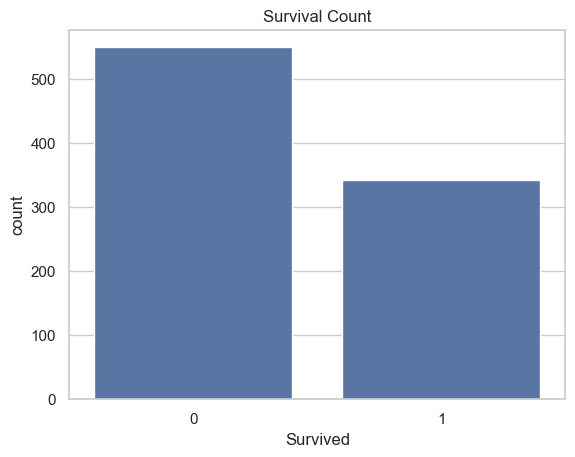

In [19]:
sns.countplot(data=train, x='Survived')
plt.title("Survival Count")


Text(0.5, 1.0, 'Survival Count by Gender')

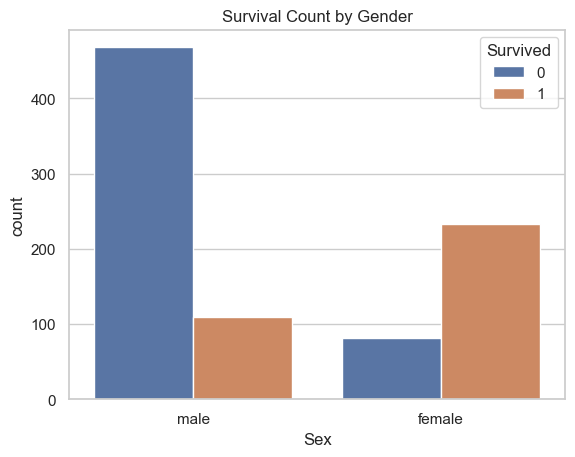

In [20]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")


Text(0.5, 1.0, 'Survival Count by Ticket Class')

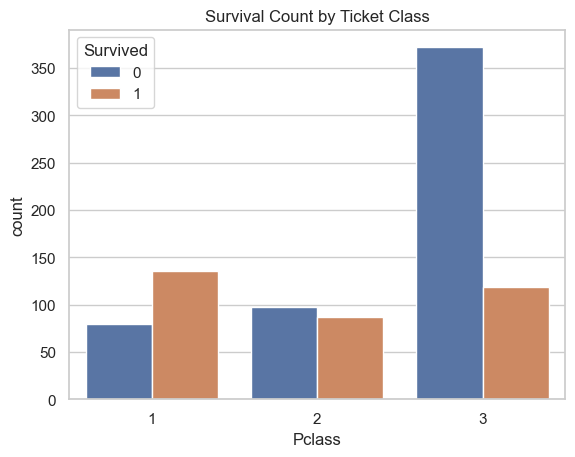

In [21]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title("Survival Count by Ticket Class")


Text(0.5, 1.0, 'Age Distribution')

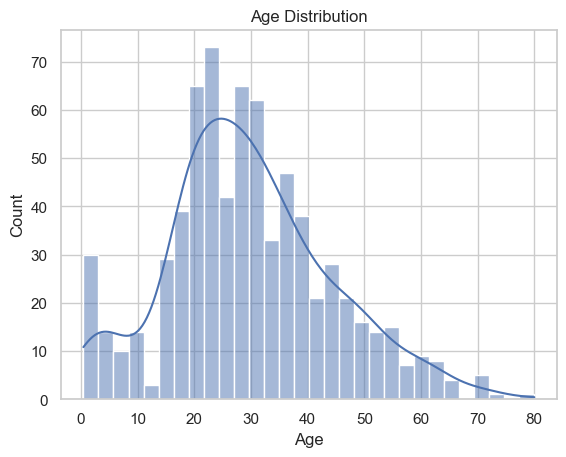

In [22]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")


In [23]:
print(train['Survived'].value_counts(normalize=True))


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [27]:
# step 4 data processing
#fill missing value because we are check in the past code in cabin embarked and age we have missing value so we need to fill
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)



In [28]:
# now when fill the missing value we need to encode the dataset to convert all categorical value to numeric value,
#  we are drop cabin so we need to encode only sex and embarked 
#here we use .map for sex because we have only 2 option male or female so we can use binary 0 1 and we use get_dummies for embarked because we have more than 2 option s c Q

# Save PassengerId for final submission
test_passenger_ids = test['PassengerId']

# Drop irrelevant or messy columns
train.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
test.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)



In [ ]:

#encode
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])  # male=1, female=0 (usually)
test['Sex'] = le.transform(test['Sex'])


In [34]:
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])


In [37]:
train, test = train.align(test, join='left', axis=1, fill_value=0)


In [36]:
#model building

from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)  # Features
y = train['Survived']               # Target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [39]:
y_pred = model.predict(X_val)


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_rf_pred))


Random Forest Accuracy: 0.8044692737430168


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions from your model
y_pred = model.predict(X_val)

# Accuracy
print("Accuracy:", accuracy_score(y_val, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Precision, recall, f1-score
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_val)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_val, y_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_rf_pred))
print("Classification Report:\n", classification_report(y_val, y_rf_pred))


Random Forest Accuracy: 0.8044692737430168
Confusion Matrix:
 [[88 17]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

